# JULIA Programlama Dilinin Temelleri

CFD temellerine giriş dersine başlamadan önce  Julia programlama dilinde değişken tanımlama, fonksiyon tanımlama, grafik çizdirme gibi konulara değinilmesi gerekmektedir. Bu amaçla 0. adım olarak bu jupyter notebook dosyası hazırlanmıştır. Dosyanın sonunda basit bir akışkanlar mekaniği problemi Julia programlama dili ile kodlanıp çözülecektir.

### Değişken Tanımlama

Tıpkı Python programlama dili gibi, Julia'da da değişken tiplerini belirtmeye gereksinim duymaksızın parametreler tanımlanabilir;

In [2]:
isim = "Akiskan"   # String tipi degisken
sart = true        # Boolean tipi degisken
x = 5              # Integer tipi degisken
y = 6.4            # Float tipi degisken
z = x*y
w = x/y

println(x, " ve ",y," un carpimi = ",z ," dir.")
println(x, " ve ",y," un bolumu = ",w ," dir.")

5 ve 6.4 un carpimi = 32.0 dir.
5 ve 6.4 un bolumu = 0.78125 dir.


Seri (array) tipi değişkenler aşağıdaki gibi tanımlanabilir ve sort() fonksiyonuyla sıralanabilir;

In [3]:
seri = [1, 23, 35, 8]
seri[2]

23

In [4]:
sort(seri)

4-element Array{Int64,1}:
  1
  8
 23
 35

### Matematiksel Operatörler

Üstel ifadeler ve matrisler MATLAB programlama dilindeki gibi ifade edilebilir;


In [5]:
a = 3
b = 4
c = sqrt(a^2 + b^2)
println(c)

5.0


In [6]:
A = [1;2;3]
B = [4 5 6]
C = [1 2 3; 4 5 6]
println(A, " ve ",B," nin carpimi = ",C ," dir.")


[1, 2, 3] ve [4 5 6] nin carpimi = [1 2 3; 4 5 6] dir.


Matrisin herhangi bir elementine ulaşmak için kullanılan indisler MATLAB programlama dilindeki gibi 1 den başlar. Yani Matrisin 1. satırının 1. sütunundaki elemana ulaşmak için;

In [7]:
C[1,1]

1

Matrislerin transpozu da kolaylıkla alınabilir;

In [8]:
transpose(C)

3×2 LinearAlgebra.Transpose{Int64,Array{Int64,2}}:
 1  4
 2  5
 3  6

Sıfır matrisler ve birim matrisler de kolaylıkla oluşturulabilir;

In [9]:
sifir_matris = zeros(3,3)

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [10]:
birim_matris = ones(4,4)

4×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

Matematikteki birçok sembol, Julia'da LaTeX komutları ile tanımlanabilir. İlgili değişken ismini yazıp Tab'a bastığınızda Julia matematiksel değeri çağıracaktır;

In [11]:
π     #\pi    + (Tab'a basiniz) 
ℯ     #\euler + (Tab'a basiniz)


ℯ = 2.7182818284590...

In [12]:
α = 4     #\alpha + (Tab)
β = 3     #\beta  + (Tab)
Δ = α-β   #\Delta + (Tab) = [\alpha + (Tab)] - [\beta  + (Tab)]

1

### Fonksiyonlar

CFD çözücülerinde çok işlem tekrarı yapıldığı için fonksiyonlar sıklıkla kullanılır. Fonksiyon tanımlamak için MATLAB programlama dilindekine benzer şekilde belirlenmiş değişkenlere bağlı biçimde matematiksel fonksiyonlar tanımlanabilir;

In [13]:
function f(x,y,z)
    sonuc = x^2+y^2+z^2
end

f (generic function with 1 method)

Fonksiyonlar her programlama dilinde olduğu gibi bir sonuç döndürecek şekilde de yazılabilir;

In [14]:
function basinc_hesapla(rho, g, h)
    sonuc = rho*g*h
    return sonuc
end

basinc_hesapla (generic function with 1 method)

In [15]:
basinc = basinc_hesapla(1.25, 9.81, 1000)

12262.500000000002

Fonksiyonlara yönelik ileri işlemler derslerde karşılaşıldıkça kullanılacaktır.

### Döngüler

Döngüler programlamanın temel yapıtaşlarındandır. Özellikler çözücü kodlarken etkili kullanılması gereken döngüler belirli işlemleri belirli sayıda veya belirlenen bir şartı sağlayıncaya kadar çalışırlar. 

In [16]:
for i=1:1:5
    println(i)
end

1
2
3
4
5


1 den 10 a kadar olan sayıların toplamını hesaplayan kod aşağıdaki gibi basitçe yazılabilir;

In [17]:
toplam = 0
for i = 1:1:10
    toplam+=i
end
println(toplam)

55


Aynı hesaplama **while** döngüsü ile şart belirterek şu şekilde yapılabilir;


In [18]:
toplam = 0
i=1
while i<=10
    toplam+=i
    i+=1
end
println(toplam)

55


### Şart Yapıları

Belirli durumlarda bilgisayara ne yapacağını belirtmek için şart yapılarını kullanmak gerekir. Benzer şekilde şart yapılarının da çok efektif bir şekilde çözücülerin içinde yer alması gerekir. Aşağıdaki örnekte Mach sayısı verilen bir akışı sınıflandıran bir şart yapısı verilmiştir;


In [19]:
Mach=1.5

1.5

In [20]:
if Mach<1
    println("Ses altı akış")
elseif Mach==1
    println("Sonik akış")
elseif Mach > 1
    println("Süpersonik akış")
else
    println("Tanımsız akış")
end

Süpersonik akış


### Grafik Çizdirme

Bulunan sonuçların görsellendirilmesi sonuçları yorumlamayı kolaylaştırmaktadır. Julia programlama dili Python programlama diline ait olan **Matplotlib** kütüphanesiyle bağlantılı bir şekilde çalışabilmektedir. Aşağıdaki örnekte **y=x^2** fonksiyonunun belirli bir aralıktaki grafiği çizilmiştir;

In [21]:
x = -5:0.1:5
y = []
for i in x
    append!(y,i*i)  # boş olan y dizisine x^2 değerlerinin sırasıyla eklenmesi
end

Yukarıdaki işlemde çizilecek olan grafiğin x ve y değerleri for döngüsü kullanarak elde edilmiştir. Matplot kütüphanesini çağırmak için;

In [22]:
using PyPlot

Eksen isimlerini tanımladıktan sonra grafiği çizmek için;

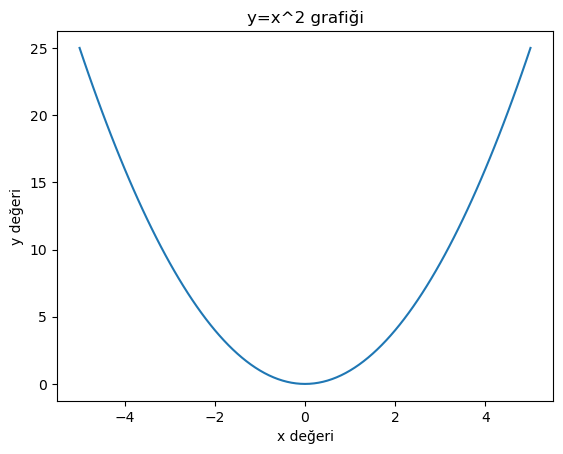

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004FA94880>

In [23]:
xlabel("x değeri")
ylabel("y değeri")
title("y=x^2 grafiği")
plot(x,y)

### Uygulama - Nozülde 1 Boyutlu Hız Dağılımı


<img src="ornek_0.png" align="left" style="width: 500px;"/>




Şekilde içerisinde hava akışı olan dairesel kesitli bir nozül verilmiştir. Giriş çapı 100mm çıkış çapı 50mm olan nozüle hava 1 kg/s kütlesel debi ile girmektedir. Boru kesiti doğrusal olarak küçüldüğüne göre boru boyunca 1 boyutlu hız dağılımını grafik ile gösterelim:

$\dot{m}=\rho_{hava} A V$

$A=\frac{\pi D^2}{4}$

$D_{giriş}$ = 100mm

$D_{çıkış}$ = 50mm

$\rho_{hava}$ = 1.25kg/m3


Öncelikle yarıçapa bağlı olarak alan hesaplayan bir fonksiyon yazılabilir;

In [24]:
function Alan(yaricap)
    return (π*yaricap^2)/4
end

Alan (generic function with 1 method)

Ardından hız fonksiyonu 3 değişkene bağlı biçimde yazılabilir;

In [25]:
function V(debi, yoğunluk, alan)
    hız = debi/(yoğunluk*alan)
    return hız
end

V (generic function with 1 method)

Fonksiyonların tanımlanmasının ardından parametreleri değişken olarak tanımyabiliriz;

In [26]:
debi = 1
D_giriş  = 0.100
D_çıkış  = 0.050
yoğunluk = 1.25

1.25

Ardından giriş çapından çıkış çapına kadar hızları hesaplayan döngü aşağıdaki gibi yazılabilir;

In [27]:
adım = 0.001     
x = D_giriş:-adım:D_çıkış
y = []
for i in x
    alan = Alan(i)
    hız = V(debi, yoğunluk, alan)
    append!(y,hız)
end   

Yukarıdaki döngü hesaplandıktan sonra artık elimizdeki x ve y değerleri ile grafik çizebiliriz;

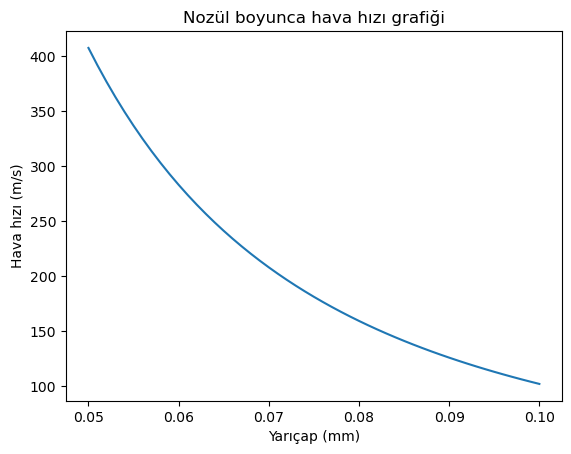

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004FF09400>

In [28]:
using PyPlot
xlabel("Yarıçap (mm)")
ylabel("Hava hızı (m/s)")
title("Nozül boyunca hava hızı grafiği")
plot(x,y)
